### Import

In [2]:
import os
import numpy as np
import sys
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import IPython.display as ipd
from matplotlib import cm
from tqdm import tqdm
from PIL import Image
from skimage import io, color
from scipy.signal import convolve
from scipy.signal import convolve2d
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import multivariate_normal as mnorm

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load

In [4]:
im = Image.open('../../data/test_images/sunflower.png')
im = im.resize((256,256))
im = np.array(im) / 255.0
imbw = np.mean(im,axis=2)

### Create Sobel Filters

In [5]:
Gx = np.zeros((3,3))
Gx[0,:] = [-1,+0,+1]
Gx[1,:] = [-2,+0,+2]
Gx[2,:] = [-1,+0,+1]

Gy = np.zeros((3,3))
Gy[0,:] = [+1,+2,+1]
Gy[1,:] = [+0,+0,+0]
Gy[2,:] = [-1,-2,-1]

### Create Color Map

In [6]:
val = np.linspace(0,2*np.pi,181)[:-1]
LAB = np.zeros((180,3))
LAB[:,1] = -np.sin(val) * 50
LAB[:,2] = np.cos(val) * 50
LAB[:,0] = ((1 + np.cos(val)) * 25) + 25
RGB = color.lab2rgb(LAB)
newcmp = ListedColormap(RGB)

### Convolution With Sobel Filters - Lenna

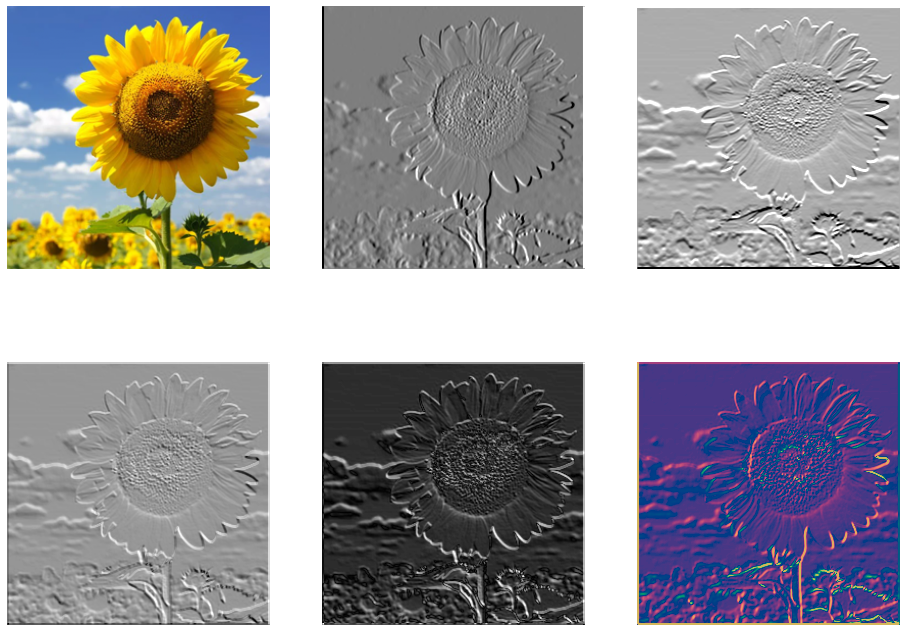

In [7]:
imx = convolve2d(imbw,Gx)
imx = imx - np.min(imx)
imx = imx / np.max(imx)
imx = imx - 0.5
imx = (imx * 4) + 0.5
imx[imx < 0] = 0
imx[imx > 1] = 1

imy = convolve2d(imbw,Gy)
imy = imy - np.min(imy)
imy = imy / np.max(imy)
imy = imy - 0.5
imy = (imy * 4) + 0.5
imy[imy < 0] = 0
imy[imy > 1] = 1

imxy = np.sqrt(imx**2 + imy**2)
theta = np.arctan2(imy,imx)
thetaidx = (np.floor(theta / np.pi * 359)).astype(int)
cmap = RGB[thetaidx,:]
imxy_norm = imxy - np.min(imxy)
imxy_norm = imxy_norm / np.max(imxy_norm)
imxy_norm = np.abs(imxy_norm - 0.5)

plt.figure(figsize=(16,12));
plt.subplot(2,3,1)
plt.imshow(im,cmap='gray')
plt.axis('off');
plt.subplot(2,3,2)
plt.imshow(imx,cmap='gray')
plt.axis('off');
plt.subplot(2,3,3)
plt.imshow(imy,cmap='gray')
plt.axis('off');
plt.subplot(2,3,4)
plt.imshow(imxy,cmap='gray')
plt.axis('off');
plt.subplot(2,3,5)
plt.imshow(imxy_norm,cmap='gray')
plt.axis('off');
plt.subplot(2,3,6)
plt.imshow(theta,cmap=newcmp)
plt.axis('off');
#plt.colorbar()
plt.savefig('../../assets/matplotlib/027_sobel_2.png', dpi=300,bbox_inches="tight")

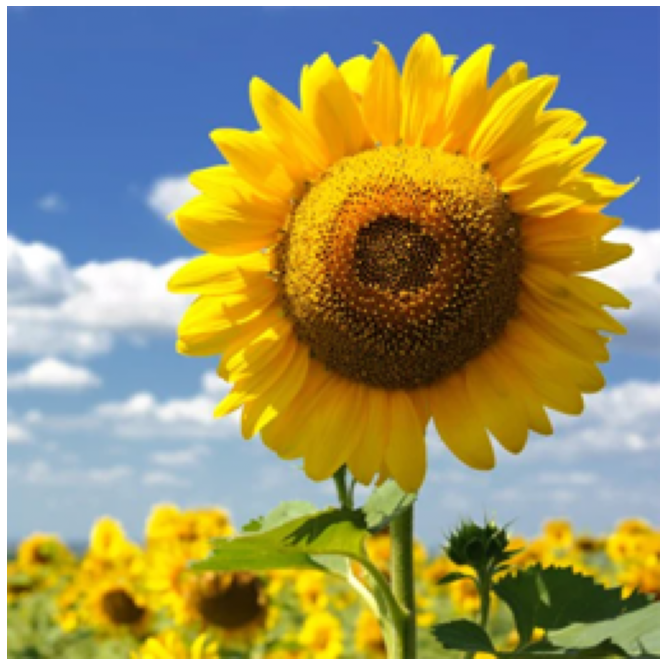

In [9]:
plt.figure(figsize=(12,12));
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.savefig('../../assets/matplotlib/027_sobel_3.png', dpi=300,bbox_inches="tight")